# Part 2 - Locating Addresses

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Geocode-Address" data-toc-modified-id="Geocode-Address-1">Geocode Address</a></span><ul class="toc-item"><li><span><a href="#Single-line-address" data-toc-modified-id="Single-line-address-1.1">Single-line address</a></span><ul class="toc-item"><li><span><a href="#Example-of-World-Series-POI" data-toc-modified-id="Example-of-World-Series-POI-1.1.1">Example of World Series POI</a></span></li></ul></li><li><span><a href="#Multi-field-address" data-toc-modified-id="Multi-field-address-1.2">Multi-field address</a></span><ul class="toc-item"><li><span><a href="#Example-of-an-Indian-address" data-toc-modified-id="Example-of-an-Indian-address-1.2.1">Example of an Indian address</a></span></li><li><span><a href="#Example-of-a-Mexican-address" data-toc-modified-id="Example-of-a-Mexican-address-1.2.2">Example of a Mexican address</a></span></li><li><span><a href="#Example-of-a-Spanish-Address" data-toc-modified-id="Example-of-a-Spanish-Address-1.2.3">Example of a Spanish Address</a></span></li></ul></li></ul></li><li><span><a href="#Search-for-street-intersections" data-toc-modified-id="Search-for-street-intersections-2">Search for street intersections</a></span></li><li><span><a href="#Understanding-the-geocoded-result" data-toc-modified-id="Understanding-the-geocoded-result-3">Understanding the geocoded result</a></span><ul class="toc-item"><li><span><a href="#The-output-fields" data-toc-modified-id="The-output-fields-3.1">The output fields</a></span></li><li><span><a href="#Read-into-a-DataFrame" data-toc-modified-id="Read-into-a-DataFrame-3.2">Read into a DataFrame</a></span><ul class="toc-item"><li><span><a href="#Plot-the-accuracy-of-different-results-as-a-bar-plot" data-toc-modified-id="Plot-the-accuracy-of-different-results-as-a-bar-plot-3.2.1">Plot the accuracy of different results as a bar plot</a></span></li></ul></li></ul></li><li><span><a href="#Advanced-Options" data-toc-modified-id="Advanced-Options-4">Advanced Options</a></span><ul class="toc-item"><li><span><a href="#search_extent-parameter" data-toc-modified-id="search_extent-parameter-4.1"><code>search_extent</code> parameter</a></span></li><li><span><a href="#as_featureset-parameter" data-toc-modified-id="as_featureset-parameter-4.2"><code>as_featureset</code> parameter</a></span><ul class="toc-item"><li><span><a href="#Example-using-search_extent--&amp;-etc." data-toc-modified-id="Example-using-search_extent--&amp;-etc.-4.2.1">Example using <code>search_extent</code>  &amp; etc.</a></span></li></ul></li><li><span><a href="#location-parameter" data-toc-modified-id="location-parameter-4.3"><code>location</code> parameter</a></span></li><li><span><a href="#distance-parameter" data-toc-modified-id="distance-parameter-4.4"><code>distance</code> parameter</a></span><ul class="toc-item"><li><span><a href="#Example-using-location-and-distance" data-toc-modified-id="Example-using-location-and-distance-4.4.1">Example using <code>location</code> and <code>distance</code></a></span></li></ul></li><li><span><a href="#max_locations-parameter" data-toc-modified-id="max_locations-parameter-4.5"><code>max_locations</code> parameter</a></span></li><li><span><a href="#category-parameter" data-toc-modified-id="category-parameter-4.6"><code>category</code> parameter</a></span></li><li><span><a href="#for_storage-parameter" data-toc-modified-id="for_storage-parameter-4.7"><code>for_storage</code> parameter</a></span></li><li><span><a href="#out_sr-parameter" data-toc-modified-id="out_sr-parameter-4.8"><code>out_sr</code> parameter</a></span></li><li><span><a href="#out_fields-parameter" data-toc-modified-id="out_fields-parameter-4.9"><code>out_fields</code> parameter</a></span><ul class="toc-item"><li><span><a href="#Example-using-out_sr-and-out_fields" data-toc-modified-id="Example-using-out_sr-and-out_fields-4.9.1">Example using <code>out_sr</code> and <code>out_fields</code></a></span></li></ul></li><li><span><a href="#source_country-parameter" data-toc-modified-id="source_country-parameter-4.10"><code>source_country</code> parameter</a></span></li><li><span><a href="#lang_code-parameter" data-toc-modified-id="lang_code-parameter-4.11"><code>lang_code</code> parameter</a></span></li><li><span><a href="#match_out_of_range-parameter" data-toc-modified-id="match_out_of_range-parameter-4.12"><code>match_out_of_range</code> parameter</a></span></li><li><span><a href="#location_type-parameter" data-toc-modified-id="location_type-parameter-4.13"><code>location_type</code> parameter</a></span></li></ul></li><li><span><a href="#Commonly-Seen-Errors" data-toc-modified-id="Commonly-Seen-Errors-5">Commonly Seen Errors</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li></ul></div>

## Geocode Address

The `geocode()` function supports searching for places and addresses either in a single field format or in a multi-field format with the address components separated into multiple parameters.

The code below imports the `geocode` function and displays its signature and parameters, along with a brief description:

In [8]:
from arcgis.geocoding import geocode
from arcgis.map import Map
from arcgis.gis import GIS
from arcgis.map.popups import PopupInfo
from arcgis.geometry import Point

In [2]:
help(geocode)

Help on function geocode:

geocode(address: 'Union[list[str], dict[str, str]]', search_extent: 'Optional[str]' = None, location: 'Optional[Union[list, tuple]]' = None, distance: 'Optional[int]' = None, out_sr: 'Optional[dict[str, Any]]' = None, category: 'Optional[str]' = None, out_fields: 'str' = '*', max_locations: 'int' = 20, magic_key: 'Optional[str]' = None, for_storage: 'bool' = False, geocoder: 'Optional[Geocoder]' = None, as_featureset: 'bool' = False, match_out_of_range: 'bool' = True, location_type: 'str' = 'street', lang_code: 'Optional[str]' = None, source_country: 'Optional[str]' = None)
The ``geocode`` function geocodes one location per request.



### Single-line address

`geocode()` can be called with one required parameter `address` or can be used with optional parameters to fine-tune the search results such as `search_extent`.

  - The `address` parameter specifies the location to be geocoded. This can be a string containing the single line address, i.e street address, place name, postal code, or POI.

In [9]:
gis = GIS(profile = "your_enterprise_profile") # log in with your own enterprise or AGOL profile configuration

As seen in <a href="https://developers.arcgis.com/python/guide/part1-what-is-geocoding/#using-the-geocode-module">Part 1</a>, `geocode` performed upon a single line address returns matched geocoded results. The more details provided onto the address string, the more refined result set becomes.

In [4]:
single_line_address = "380 New York Street, Redlands, CA 92373"

In [5]:
# geocode the single line address
esrihq = geocode(single_line_address)
len(esrihq)

1

If we loosen up on the single-line address definition, e.g. remove the city and state name, then the length of the returned result set increases to 20.

In [6]:
single_line_address = "380 New York Street"

In [7]:
# geocode the single line address
esrihq = geocode(single_line_address)
len(esrihq)

20

#### Example of World Series POI

Another example of such is to define the single line address of search to be `Disneyland, USA`, as compared to `Disneyland`. The former returns matched results in USA only while the latter is returning all in the world.

In [8]:
disney = geocode("Disneyland, USA")
len(disney)

2

In [9]:
for i in range(len(disney)):
    print(disney[i]['attributes']['LongLabel'])
    print(" - ",disney[i]['attributes']['Score'], 
          " - ", disney[i]['attributes']['Addr_type'], 
          " - ", disney[i]['attributes']['Type'])

Disneyland, 1313 S Harbor Blvd, Anaheim, CA, 92802, USA
 -  100  -  POI  -  Amusement Park
Disneyland, Anaheim, CA, USA
 -  100  -  POI  -  Amusement Park


In [10]:
disney = geocode("Disneyland")
len(disney)

20

In [11]:
for i in range(20):
    if disney[i]['attributes']['Type']== "Amusement Park":
        print(disney[i]['attributes']['LongLabel'])
        print(" - ",disney[i]['attributes']['Score'], 
              " - ", disney[i]['attributes']['Addr_type'])

Disneyland, 1313 S Harbor Blvd, Anaheim, CA, 92802, USA
 -  100  -  POI


### Multi-field address

Alternatively, the address can be specified in a multi-field format using a `dict` containing the various address fields accepted by the corresponding geocoding service.

In order to provide a way to find addresses in many different countries, which may use different addressing formats, the `geocode()` method uses standardized field names for submitting address components. In understanding what specific fields are needed to enter for your address, you can check out <a href="https://developers.arcgis.com/python/guide/part1-what-is-geocoding/#what-are-geocoders-and-their-types">the `addressField` introduction</a> for more information.

The Geocoder's `address` field property specifies the various address fields accepted by it when geocoding addresses. The neighborhood, city, subregion, and region parameters represent typical administrative divisions within a country. They may have different contexts for different countries, and not all administrative divisions are used in all countries. For instance, with addresses in the United States, only the `city` (city) and `region` (state) parameters are used; for addresses in Mexico, the `neighborhood` parameter is used for `districts` (colonias) within a city, `city` for `municipalities` (municipios), and the `region` parameter for `states` (estados); Spain uses all four administrative divisions.

For example, if the `address` field of a geocoding service resource includes fields with the following names: `Address, City, Region and Postal`, then the address argument is of the form below.

In [12]:
multi_field_address = { 
                        "Address" : "380 N Y St",
                        "City" : "Redlands",
                        "Region" : "CA",
                        "Postal" : 92373
                      }

In [13]:
# geocode the multi_field_address
esrihq1 = geocode(multi_field_address)
len(esrihq1)

1

The returned result set contains two `dict` objects, and we can see from below that each `dict` object contains 'address', 'location', 'score', 'attributes', and 'extent' keys. The `x` and `y` coordinates can be found in both `location` and `attributes` properties.

In [14]:
esrihq1[0].keys()

dict_keys(['address', 'location', 'score', 'attributes', 'extent'])

In [15]:
esrihq1[0]['location'], esrihq1[0]['extent']

({'x': -117.195649834906, 'y': 34.057251584743},
 {'xmin': -117.195790019279,
  'ymin': 34.056264995788,
  'xmax': -117.193790019279,
  'ymax': 34.058264995788})

We can also go one level deeper and check out the `address type`, `X` and `Y` coordinates from its `attributes` field for more details.

In [16]:
esrihq1[0]['attributes']['Addr_type'], esrihq1[0]['attributes']['X'], esrihq1[0]['attributes']['Y']

('PointAddress', -117.195649834906, 34.057251584743)

#### Example of an Indian address

<img src="https://lp-cms-production.imgix.net/2020-11/GettyRF_494057771.jpg" height="50%" width="50%"/>
<p style="text-align: center;">Photo of Taj Mahal (Source: <a href="https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.lonelyplanet.com%2Farticles%2Fvisiting-taj-mahal-guide-history-facts&psig=AOvVaw3e8AR8FIHbVtWW31bK5U2q&ust=1617828187353000&source=images&cd=vfe&ved=0CAkQjhxqFwoTCJD9wpW-6u8CFQAAAAAdAAAAABAD">Lonely Planet</a>)</p>

In [17]:
india_mfield_address = { 
                        "Address" : "Taj Mahal",
                        "City": "Agra",
                        'District': 'Taj Ganj',
                        "Region" : 'Uttar Pradesh',
                        "Country": "IND",
                        "Postal" : 282001
                      }

In [18]:
# geocode the multi_field_address
taj_mahal = geocode(india_mfield_address)
len(taj_mahal)

2

#### Example of a Mexican address

<img src="https://i.natgeofe.com/n/98771a48-54dd-4f50-abec-4dfb6b55b292/cityscape-san-miguel-de-allende-mexico.jpg?w=374&h=280, https://i.natgeofe.com/n/98771a48-54dd-4f50-abec-4dfb6b55b292/cityscape-san-miguel-de-allende-mexico.jpg?w=748&h=560 2x" width="50%" height="50%">
<p style="text-align: center;">Photo of San Miguel de Allende (Source: <a href="https://www.nationalgeographic.com/travel/destination/san-miguel-de-allende">National Geography</a>)</p>

In [19]:
mex_mfield_address = { 
                        "Address" : "San Miguel de Allende",
                        "City": 'San Miguel de Allende',
                        "Region" : 'Guanajuato',
                        "Country": "MEX"
                      }

In [20]:
# geocode the multi_field_address
san_miguel = geocode(mex_mfield_address)
len(san_miguel)

7

#### Example of a Spanish Address

<img width="50%" height="50%" src="https://www.culturalplaces.com/blog/wp-content/uploads/2020/09/sagrada-familia-1-1024x704.jpg">
<p style="text-align: center;">Photo of Sagrada Familia (Source: <a href="https://www.culturalplaces.com/">https://www.culturalplaces.com/</a>)</p>

In [10]:
esp_mfield_address = { 
                        "Address" : "Sagrada Familia",
                        'Nbrhd': 'Sagrada Familia',
                        'District': 'Barcelona',
                        'City': 'Barcelona',
                        'Region': 'Catalunya',
                        "Country": "ESP"
                      }

In [11]:
# geocode the multi_field_address
sag_fam = geocode(esp_mfield_address)
len(sag_fam)

20

## Search for street intersections

The following example illustrates how to search for a street intersection. An intersection is where two streets cross each other, and hence an intersection search consists of the intersecting street names plus the containing administrative division or postal code. For example, `redlands blvd and new york st 92373` is a valid intersection search, as is `redlands blvd & new york st redlands ca`.

In [23]:
intersection = "redlands blvd and new york st 92373"

In [24]:
multi_field_intersection = { 
    "Address" : "redlands blvd & new york st",
    "City" : "Redlands",
    "Region" : "CA"
    }


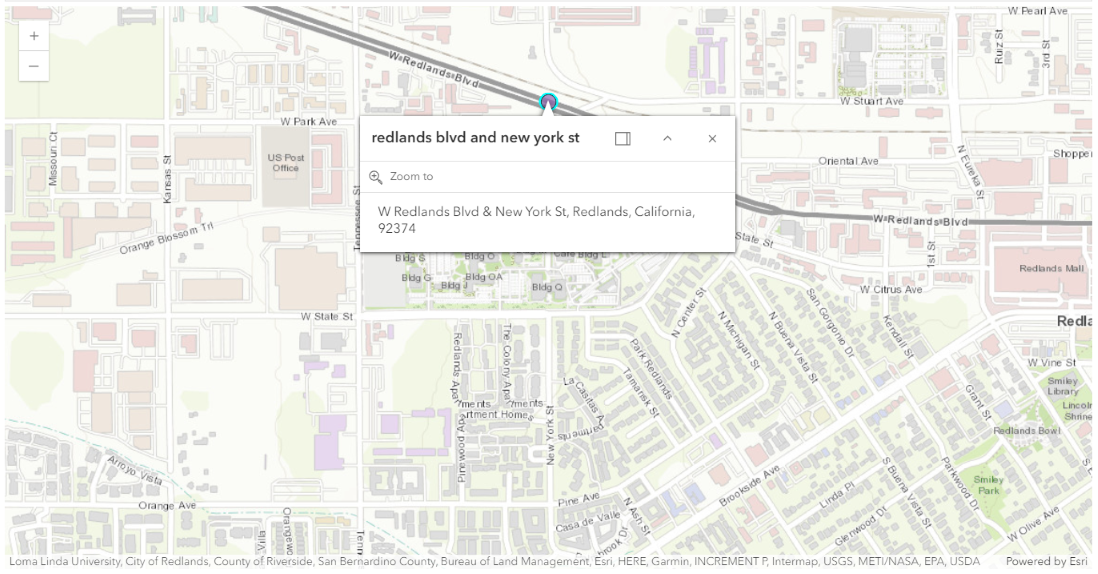

In [124]:
map2 = Map("Esri, Redlands, CA")
map2

In [26]:
map2.zoom = 15

In [27]:
# geocode the intersection address and plot the location of the first geocode result on the map
# either of the two intersection address formats can be used, they give itentical results:

# intersection_result = geocode(intersection)[0]
intersection_result = geocode(multi_field_intersection)[0]

In [28]:
intersection_result['location'].update({'spatialReference':{'wkid':4326}})

In [29]:
intersection_pt = Point(intersection_result['location'])

In [30]:
popup = PopupInfo(**{ 
            "title" : "redlands blvd and new york st", 
            "description" : intersection_result['address']
        })
map2.content.draw(intersection_pt, popup)

## Understanding the geocoded result
 
### The output fields

The `geocode()` method returns a list of `dict` object, and we can look at the first entry of the list (e.g. `intersection_result`) to determine what the included keys of the `dict` object are:

In [31]:
intersection_result.keys()

dict_keys(['address', 'location', 'score', 'attributes', 'extent'])

In [32]:
intersection_result['attributes'].keys()

dict_keys(['Loc_name', 'Status', 'Score', 'Match_addr', 'LongLabel', 'ShortLabel', 'Addr_type', 'Type', 'PlaceName', 'Place_addr', 'Phone', 'URL', 'Rank', 'AddBldg', 'AddNum', 'AddNumFrom', 'AddNumTo', 'AddRange', 'Side', 'StPreDir', 'StPreType', 'StName', 'StType', 'StDir', 'StPreDir1', 'StPreType1', 'StName1', 'StType1', 'StDir1', 'StPreDir2', 'StPreType2', 'StName2', 'StType2', 'StDir2', 'BldgType', 'BldgName', 'LevelType', 'LevelName', 'UnitType', 'UnitName', 'SubAddr', 'StAddr', 'Block', 'Sector', 'Nbrhd', 'District', 'City', 'MetroArea', 'Subregion', 'Region', 'RegionAbbr', 'Territory', 'Zone', 'Postal', 'PostalExt', 'Country', 'CntryName', 'LangCode', 'Distance', 'X', 'Y', 'DisplayX', 'DisplayY', 'Xmin', 'Xmax', 'Ymin', 'Ymax', 'ExInfo'])

See below for the descriptions for all of the fields that can be returned by `geocode()`:

 - `address`: Complete matching address returned for `findAddressCandidates` and `geocodeAddresses` geocode requests.
 - `location`: The point coordinates of the output match location as specified by the x and y properties. The spatial reference of the x and y coordinates is defined by the `spatialReference` output field. Always returned by default for `findAddressCandidates` and `geocodeAddresses` geocode requests only. 
 - `score`: A number from 1–100 indicating the degree to which the input tokens in a geocoding request match the address components in a candidate record. A score of 100 represents a perfect match, while lower scores represent decreasing match accuracy. 
 - `attributes`: A `dict` object containing `Loc_name`, `Status`, `Score`, `Match_addr`, `LongLabel`, `ShortLabel`, `Addr_type` etc. key-value pairs.
 - `extent`: the display extent of a feature returned by the geocoding service.

### Read into a DataFrame

The previous example explained how to get results as a `FeatureSet` using `as_featureset = True` parameter, and map the `FeatureSet` on the Map Widget. Next, we will convert the `FeatureSet` to a `DataFrame` and see how the results look.

In [33]:
disney_fset = geocode("Disneyland", as_featureset = True)
disney_fset

<FeatureSet> 20 features

In [34]:
disney_fset.sdf.head()

Loc_name Status  Score   Match_addr  \
0    World      T    100   Disneyland   
1    World      T    100   Disneyland   
2    World      T    100  Disney Land   
3    World      T    100   Disneyland   
4    World      T    100   Disneyland   

                                           LongLabel   ShortLabel Addr_type  \
0  Disneyland, 1313 S Harbor Blvd, Anaheim, CA, 9...   Disneyland       POI   
1  Disneyland, Place des Passagers du Vent, 77700...   Disneyland       POI   
2  Disney Land, Venkateswara Nagar, Satyanarayana...  Disney Land       POI   
3  Disneyland, Rue de Clichy, 75009, 9e Arrondiss...   Disneyland       POI   
4  Disneyland, Via Ferdinando Cassiani 101, 87019...   Disneyland       POI   

                     Type    PlaceName  \
0          Amusement Park   Disneyland   
1     Historical Monument   Disneyland   
2       Convention Center  Disney Land   
3  Transportation Service   Disneyland   
4   Office Supplies Store   Disneyland   

                                          Place_addr  ...          Y  \
0     1313 S Harbor Blvd, Anaheim, California, 92802  ...  33.815441   
1  Place des Passagers du Vent, 77700, Chessy, Se...  ...  48.871326   
2  Venkateswara Nagar, Satyanarayana Puram, Praka...  ...  15.512114   
3  Rue de Clichy, 75009, 9e Arrondissement, Paris...  ...  48.879661   
4  Via Ferdinando Cassiani 101, 87019, Spezzano A...  ...  39.669196   

     DisplayX   DisplayY        Xmin        Xmax       Ymin       Ymax ExInfo  \
0 -117.918959  33.809946 -117.923958 -117.913959  33.804946  33.814946          
1    2.783548  48.871314    2.778548    2.788548  48.866314  48.876314          
2   80.046488   15.51214   80.041488   80.051488   15.50714   15.51714          
3    2.329117  48.879612    2.324117    2.334117  48.874612  48.884612          
4   16.307362  39.669105   16.302362   16.312362  39.664105  39.674105          

  OBJECTID                                              SHAPE  
0        1  {"x": -117.92425292914, "y": 33.815440940444, ...  
1        2  {"x": 2.783480574222, "y": 48.871326237579, "s...  
2        3  {"x": 80.046578324554, "y": 15.512114370471, "...  
3        4  {"x": 2.329238050863, "y": 48.879661237048, "s...  
4        5  {"x": 16.307359182515, "y": 39.66919595983, "s...  

[5 rows x 60 columns]

In [35]:
disney_fset.sdf.Addr_type

0     POI
1     POI
2     POI
3     POI
4     POI
5     POI
6     POI
7     POI
8     POI
9     POI
10    POI
11    POI
12    POI
13    POI
14    POI
15    POI
16    POI
17    POI
18    POI
19    POI
Name: Addr_type, dtype: string

In [36]:
disney_fset.sdf.Score

0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
Name: Score, dtype: Int32

#### Plot the accuracy of different results as a bar plot

Take the four entries shown in the `disney_fset.sdf` for example. Since a score of 100 represents a perfect match, while lower scores represent decreasing match accuracy, the first entry is listed with the highest score, representing the best accuracy among all results.

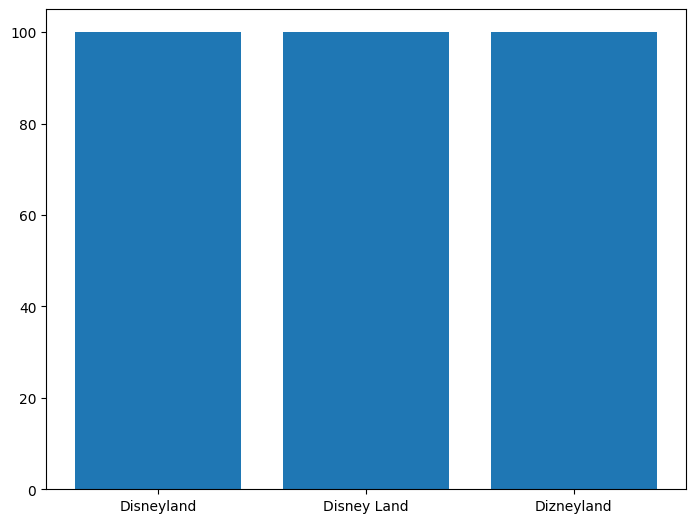

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
addrs = disney_fset.sdf.Match_addr
scores = disney_fset.sdf.Score
ax.bar(addrs,scores)
plt.show()

## Advanced Options

Advanced options for the `geocode()` method to be used for configuring and fine-tuning the search results are listed below:

 - Limit searches to a set of bounding boxes (`search_extent` param)
 - Defining an origin point location of the search to be used with distance (`location` & `distance` parameters)
 - Customizing number of geocode results (`max_locations` param)
 - Limit searches to exact address range (`match_out_of_range` param)
 - Limit searches to a particular country (`source_country` param)
 - Getting results in desired co-ordinate system (`out_sr` param)
 - Customizing output fields in the geocoded results (`out_fields` param)
 - Street coordinates vs Rooftop coordinates (`location_type` param)
 - Geocoding in languages other than English (`lang_code`) 
 - Whether the results of the operation will be persisted (`for_storage` param)
 - `magic_key` param. More explanations can be found in part 7.
  
### `search_extent` parameter

`search_extent`: An optional string of a set of bounding box coordinates that limit the search area to a specific region. This is especially useful for applications in which a user will search for places and addresses only within the current map extent.

You can specify the spatial reference of the `search_extent` coordinates, which is necessary if the map spatial reference is different than that of the geocoding service; otherwise, the spatial reference of the coordinates is assumed to be the same as that of the geocoding service.

The input can either be a comma-separated list of coordinates defining the bounding box or a JSON envelope object. The spatial reference of the bounding box coordinates can be included if an envelope object is used.

### `as_featureset` parameter

`as_featureset`: An optional boolean. If True, the result set is returned as a `FeatureSet` object. Otherwise, it is a dictionary. 

#### Example using `search_extent`  & etc.
The example below uses Esri headquarter's bbox as `search_extent`, and the geocoded results got filtered down to 1 (from the original count of 20).

In [38]:
# geocode the single line address
esrihq_fset = geocode(single_line_address, 
                      search_extent = {'xmin': -117.19587199429185,
                                       'ymin': 34.056237000231285,
                                       'xmax': -117.19387199429184,
                                       'ymax': 34.05823700023128},
                      as_featureset = True)
esrihq_fset

<FeatureSet> 1 features

In [39]:
esrihq_fset.features[0].attributes["Match_addr"]

'380 New York St, Redlands, California, 92373'


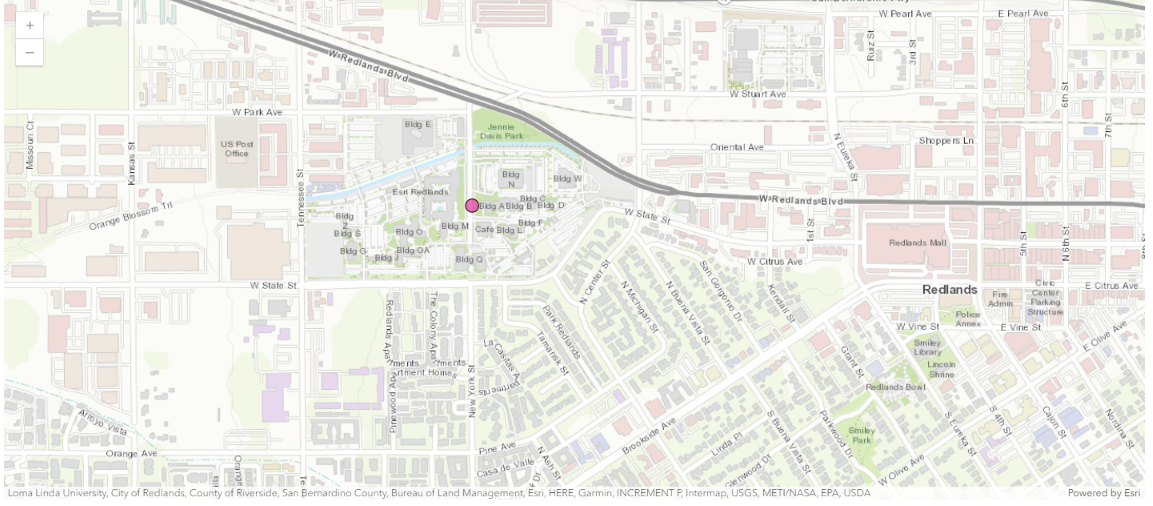

In [125]:
map0 = Map("Redlands, CA")
map0

In [63]:
# plot the location of the first geocode result on the map
map0.content.draw(esrihq_fset.features[0].geometry)

### `location` parameter

`location`: Optional [x,y] defining an origin point location that is used with the distance parameter to sort geocoding candidates based upon their proximity to the location.

The `location` parameter defines an origin point location that is used with the distance parameter to sort geocoding candidates based upon their proximity to the location. The distance parameter specifies the radial distance from the location in meters. The priority of candidates within this radius is boosted relative to those outside the radius.

This is useful in mobile applications where a user will want to search for places in the vicinity of their current GPS location; the location and distance parameters can be used in this scenario.

The location parameter can be specified without specifying a distance. If distance is not specified, it defaults to 50000 meters.

The location can be represented with a simple comma-separated syntax (x,y), or as a JSON point object. If the comma-separated syntax is used, the spatial reference of the coordinates must be WGS84. Otherwise, the spatial reference of the point coordinates can be defined in the JSON object.

Example using simple syntax (WGS84): `location=-117.196,34.056` JSON example with a spatial reference: `location= { "x": -13046165.572, "y": 4036389.847, "spatialReference": { "wkid": 102100 } }`

### `distance` parameter

The `distance` parameter specifies the radius of an area around a point location that is used to boost the rank of geocoding candidates so that candidates closest to the location are returned first. The distance value is in meters.

If the distance parameter is specified, then the location parameter must be specified as well.

It is important to note that unlike the searchExtent parameter, the location and distance parameters allow searches to extend beyond the specified search radius. They are not used to filter results, but rather to rank resulting candidates based on their distance from a location. You must pass a searchExtent value in addition to location and distance if you want to confine the search results to a specific area.

Example of searching within two miles of the current extent: `distance=3218.69`

#### Example using `location` and `distance`

In [12]:
sag_fam = geocode(esp_mfield_address)
len(sag_fam)

20

In [13]:
# geocode the multi_field_address
sag_fam_fset = geocode(esp_mfield_address,
                       location={"x":2.175161868798, "y":41.40329611172},
                       distance=3218.69,
                       as_featureset=True)
sag_fam_fset

<FeatureSet> 20 features


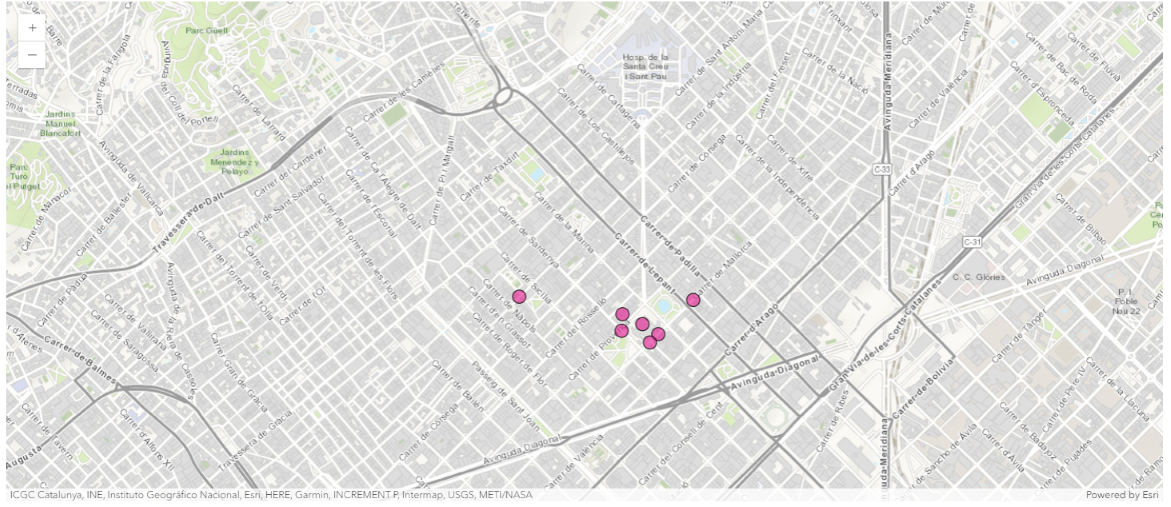

In [15]:
map1 = Map("Barcelona, ESP")
map1

In [14]:
map1.content.draw(sag_fam_fset)

### `max_locations` parameter

The `max_locations` parameter is the maximum number of locations to be returned by a search, up to the maximum number allowed by the geocoder. If not specified, then all matching candidates up to the maximum are returned.

The World Geocoding Service allows up to 20 candidates to be returned for a single request. Note that up to 50 POI candidates can be returned.

Example:
```
max_locations=10
```

### `category` parameter

The `category` parameter is a place or address type which can be used to filter geocoding results. The parameter supports input of single category values or multiple comma-separated values. The category parameter can be passed in a request with or without a single line address input. More categories can be found in <a href="https://developers.arcgis.com/python/guide/part1-what-is-geocoding/#what-are-geocoders-and-their-types">Part 1</a>.

Example of category filtering with a single category:
```
category="Address"
```
Example of category filtering with multiple categories:
```
category="Address,Postal"
```
<div class="inner_cell">
    <div class="text_cell_render border-box-sizing rendered_html">
        <blockquote>
            <p>Note: The `category` parameter is only functional when used with single line address input. It does not work with multi field addresses; specifically the address, neighborhood, city, region, subregion, countryCode, and postal parameters.</p>
        </blockquote>
    </div>
</div>


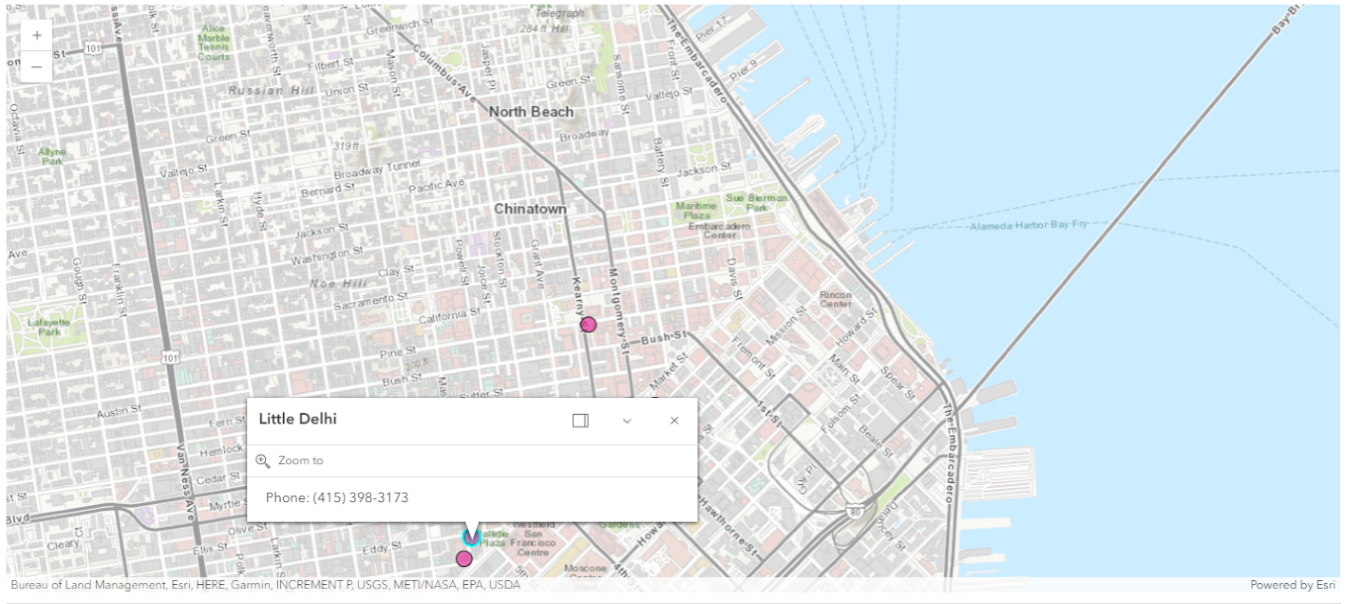

In [144]:
map3 = Map("Union Square, San Francisco, CA")
map3

In [73]:
unionsquare = geocode(address='Union Square, San Francisco, CA')[0]

In [79]:
# find and plot upto 10 Indian restaurants around Union Square in San Francisco, CA
restaurants = geocode(None, 
                      search_extent = unionsquare['extent'], 
                      category="Indian Food", 
                      max_locations=10)

In [82]:
for restaurant in restaurants:
    restaurant['location'].update({"spatialReference" : {"wkid" : 4326}})

In [86]:
for restaurant in restaurants:
    popup = PopupInfo(**{ 
        "title" : restaurant['address'], 
        "description" : "Phone: " + restaurant['attributes']['Phone']
    })
    map3.content.draw(restaurant['location'], popup)

### `for_storage` parameter

This parameter specifies whether the results of the operation will be persisted. The default value is `False`, which indicates the results of the operation can't be stored, but they can be temporarily displayed on a map for instance. If you store the results, in a database for example, you need to set this parameter to `True`.

Applications are contractually prohibited from storing the results of geocoding transactions unless they make the request by passing the `for_storage` parameter with a value of true.

ArcGIS Online service credits are deducted from the organization account for each geocode transaction that includes the `for_storage` parameter with a value of true. Refer to the <a href="http://www.esri.com/SOFTWARE/ARCGIS/ARCGISONLINE/CREDITS">ArcGIS Online service credits overview page</a> for more information on how credits are charged.

To learn more about geocoding operations, see <a href="https://developers.arcgis.com/rest/geocode/api-reference/overview-world-geocoding-service.htm">this help topic</a>.

Example:
```
for_storage=True
```

In [87]:
starbucks_fset = geocode("Starbucks", unionsquare['extent'], 
                         max_locations=10,
                         as_featureset=True,
                         for_storage=True)
starbucks_fset

<FeatureSet> 10 features

### `out_sr` parameter

The spatial reference of the x/y coordinates returned by the geocode method. This is useful for applications using a map with a spatial reference different than that of the geocoder.

The spatial reference can be specified as either a well-known ID (WKID) or as a JSON spatial reference object. If outSR is not specified, the spatial reference of the output locations is the same as that of the geocoder. The World Geocoding Service spatial reference is WGS84 (WKID = 4326).

For a list of valid WKID values, see the [Using spatial references](https://developers.arcgis.com/rest/services-reference/enterprise/using-spatial-references/) documentation.

Example (102100 is the WKID for the Web Mercator projection):
```
out_sr=102100
```

### `out_fields` parameter

The list of fields to be returned in the response. Descriptions for each of these fields are available in the Output fields section of this document.

The returned address, x/y coordinates of the match location, match score, spatial reference, extent of the output feature, and the addr_type (match level) are returned by default.

Example that returns all output fields:
```
out_fields=*
```
Example that returns the specified fields only:
```
out_fields="AddrNum,StName,City"
```

#### Example using `out_sr` and `out_fields`

Next, let's look at an example in which we output the result set in a different spatial reference than the default `sr`, and let's limit the output fields to be only containing Addr_type,AddrNum,StName,City,X,Y columns.

In [88]:
esrihq2 = geocode(multi_field_address,
                  out_sr={
                             "wkid" : 3857,
                             "latestWkid" : 102100
                         },
                  out_fields="Addr_type,AddrNum,StName,City,X,Y")
len(esrihq2)

1

In [89]:
esrihq2[0]['location'], esrihq2[0]['extent']

({'x': -13046160.062808568, 'y': 4036492.108267532},
 {'xmin': -13046175.668061528,
  'ymin': 4036359.544834015,
  'xmax': -13045953.02907994,
  'ymax': 4036628.277268785})

We can compare the output cell shown above to the output without specifying `out_sr` and `out_fields`:
```
({'x': -117.19568252432872, 'y': 34.05723700023128},

 {'xmin': -117.19587199429185,
  'ymin': 34.056237000231285,
  'xmax': -117.19387199429184,
  'ymax': 34.05823700023128})
```

It is obvious that the `x`, `y` coordinates represented in `location` field, and the `bbox` as shown in the `extents` field, have been reprojected. However, if we look at the `attributes` field of the result, the `X` and `Y` responses are still the same as the non-projected ones.

In [90]:
esrihq2[0]['attributes']['Addr_type'], esrihq2[0]['attributes']['X'], esrihq2[0]['attributes']['Y']

('PointAddress', -117.195649834906, 34.057251584743)

On the other hand, if querying for an attribute key that is not in `out_fields`, then the user will see `KeyError` shown as what's being returned here:

In [92]:
esrihq2[0]['attributes']['Postal']

KeyError: 'Postal'

### `source_country` parameter

`source_country` limits the returned candidates to the specified country or countries for either single-field or multifield requests. Three-character country codes are the acceptable values for this parameter. A list of supported countries and codes is available in <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocode-coverage.htm">Geocode coverage</a>. Multiple country codes can be specified (comma-separated with no spaces) to return results for more than one country.

Example
```
sourceCountry=FRA,DEU,ESP
```

### `lang_code` parameter

`lang_code` sets the language in which geocode results are returned. This is useful for ensuring that results are returned in the expected language. If the langCode parameter isn't included in a request, or if it is included but there are no matching features with the input language code, then the resultant match is returned in the language code of the primary matched components from the input search string. See <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocode-coverage.htm">the table of supported countries</a> for more information and valid language code values in each country. Note that full language names cannot be used in the `lang_code` parameter.

Example
```
langCode=fr
```

Now let's look at an example of geocoding at `'Western Wall'`. We will specify the geocode to be performed inside the country of Israel and to return the results in Hebrew.

In [93]:
# when `lang_code` is not set, default to return results in English
western_wall_en = geocode("Western Wall", source_country = "ISR")
western_wall_en[0]['attributes']['LongLabel']

'Western Wall, Rehov Shaar Hashelshelet, Yerushalayim'

In [107]:
western_wall = geocode("Western Wall", source_country = "ISR", lang_code="HE")
western_wall[0]['attributes']['LongLabel']

'הכותל המערבי, רחוב שער השלשלת, ירושלים'

Similarly, here we revisit a previous example of geocoding at `'Sharm el-Sheikh'`, only this time, we also specify the geocode to be performed inside the country of Egypt and to return the result in Arabic:

In [110]:
# when `lang_code` is not set, default to return results in English
sharm_el_sheikh_en = geocode("Sharm El-Sheikh", source_country="EGY")
sharm_el_sheikh_en[0]['attributes']['LongLabel']

'Sharm El Sheikh, South Sinai, EGY'

In [111]:
sharm_el_sheikh = geocode("Sharm El-Sheikh", source_country="EGY", lang_code="AR")
sharm_el_sheikh[0]['attributes']['LongLabel']

'شرم الشيخ, جنوب سينا'

### `match_out_of_range` parameter

The `match_out_of_range` parameter provides better spatial accuracy for inexact street addresses by specifying whether matches should be returned when the input number is outside of the house range defined for the input street. `Out of range matches` will be defined as `Addr_type=StreetAddressExt`. Input house numbers that exceed the range on a street segment by more than `100` will not result in streetAddressExt matches. For streets with smaller house numbers, the maxOutOfRange tolerance is less than 100. The default value of this parameter is true. Check out more on this topic at <a href="https://community.esri.com/t5/addressing-questions/geocoding-match-out-of-range/td-p/870943">Esri Community</a>.
```
Values: True | False
```


When `match_out_of_range` is not set or set to True, `geocode` will need to include the inexact estreet addresses as matched results. When set to False, then the results outside of the house range can be excluded.

In [112]:
res_list = geocode("109 Main Street, Fairfax, VA", match_out_of_range=False)
print(len(res_list), " potential matches:")
for res in res_list:
    print(res['attributes']['LongLabel'], " | ", res['attributes']['Addr_type'])

15  potential matches:
Main St, Fairfax, VA, 22030, USA  |  StreetName
Main St, Fairfax, VA, 22031, USA  |  StreetName
Main St, Fairfax, VA, 22032, USA  |  StreetName
Main St, Fairfax, VA, 22032, USA  |  StreetName
109 S Main St, Culpeper, VA, 22701, USA  |  StreetAddress
109 N Main St, Culpeper, VA, 22701, USA  |  StreetAddress
Main St, Clifton, VA, 20124, USA  |  StreetName
Main St, Alexandria, VA, 22309, USA  |  StreetName
Main Dr, Herndon, VA, 20170, USA  |  StreetName
MainStreet Bank, 4029 Chain Bridge Rd, Fairfax, VA, 22030, USA  |  POI
MainStreet Bank, 10089 Fairfax Blvd, Fairfax, VA, 22030, USA  |  POI
MainStreet Bank, 10089 Fairfax Blvd, Fairfax, VA, 22030, USA  |  POI
MainStreet Bank, 4029 Chain Bridge Rd, Fairfax, VA, 22030, USA  |  POI
MainStreet Bank, 727 Elden St, Herndon, VA, 20170, USA  |  POI
MainStreet Bank, 1354 Old Chain Bridge Rd, Mc Lean, VA, 22101, USA  |  POI



### `location_type` parameter

The `location_type` parameter specifies whether the `rooftop point` or `street entrance` should be the output geometry of PointAddress matches. By default, `street` is used, which can be useful for routing scenarios, as the rooftop location of some addresses may be offset from a street by a large distance. However, for map display purposes, it may be desirable to use rooftop instead, especially when large buildings or landmarks are geocoded. 

The location parameter only affects the location object in the JSON response and does not change the x,y or DisplayX/DisplayY attribute values.

As we will see in the example below, when the `location_type="rooftop"`, map rendering of the specific point uses the rooftop point, which reflects the detailed location of `PointAddress` better. When `location_type="street"`, map rendering of the returned geocoded result usually plots the point at the street.

In [121]:
res_fset = geocode("380 New York St, 92373", location_type="rooftop", as_featureset=True)

In [122]:
res_fset2 = geocode("380 New York St, 92373", location_type="street", as_featureset=True)


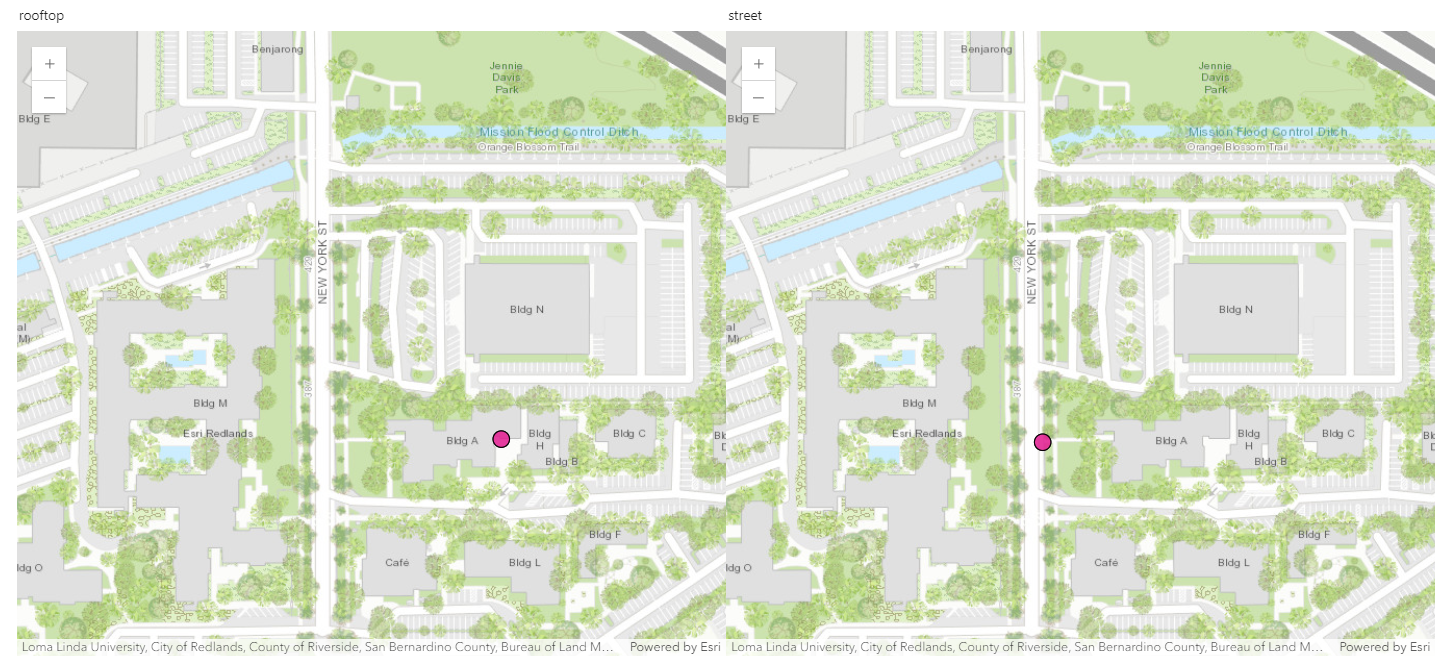

In [145]:
from ipywidgets import HBox, VBox, Label, Layout

# create 3 map widgets
map1 = Map("Redlands, CA")
map1.zoom = 14
map2 = Map("Redlands, CA")
map2.zoom = 14

map1.sync_navigation(map2)

box1 = VBox([Label('rooftop'), map1], layout=Layout(width='50%'))
box2 = VBox([Label('street'), map2], layout=Layout(width='50%'))

hbox = HBox([box1, box2])

# Display the HBox
display(hbox)


In [123]:
map1.content.draw(res_fset) #shown on the left panel, as point on the rooftop of a building
map2.content.draw(res_fset2) #shown on the right, as point at the street

## Commonly Seen Errors

Error messages (and/or error codes) are returned when the geocoding service cannot complete a request. This can be due to invalid parameters being included in the request or insufficient user permissions. Some potential errors that may be encountered with the service are described below.

 -  `Exception: Invalid Token (Error Code: 498)` 
    Possible causes:
     - The token associated with the current GIS object might be expired or invalid. You can try signing in to the GIS object again.
     
 - `Unable to complete operation (Error Code: 400)`
    Possible causes:
     - `<parameter name> parameter value exceeds the maximum length of <maximum length> characters allowed for the parameter value.` This error is returned if the input parameter value contains too many characters. For example, if the SingleLine parameter value exceeds 100 characters, this error is returned.
     - `Category parameter value entered is not supported` This error is returned when an invalid category parameter value is included in a request.
    
 - `Cannot perform query. Invalid query parameters. (Error Code: 400)`
    Possible causes:
     - `Unable to find address for the specified location.` Returned when no match can be found for a reverseGeocode operation.
     
 - `Invalid or missing input parameters. (Error Code: 400)`  
   Possible causes:
    
     - This error is returned if a request is missing a required parameter.    

<div class="inner_cell">
    <div class="text_cell_render border-box-sizing rendered_html">
        <blockquote>
            <p>Other error messages can be found in the <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-service-output.htm#ESRI_SECTION2_8CBF0ACE9919482384ED1EF4D4E1441D">help on geocoding service output</a>.</p>
        </blockquote>
    </div>
</div>

## Conclusions

In Part 2, we have walked through various approaches of performing `geocode()` to locate addresses using single line address, or multi-field address, with or without advanced parameters. Next in <a href="https://developers.arcgis.com/python/guide/part3-finding-point-of-interests/">Part 3</a>, we will talk about how to geocode point of interests.